# **Analisis Penjualan & Prediksi Profit pada Superstore**

Dalam Data Science, hal yang paling penting adalah pemahaman tentang data yang digunakan baik tipe data, struktur data maupun distribusi data

In [61]:
#supaya ketika close google colabnya dataset tidak hilang, saranku upload datanya di Gdrive trus sesuaiin linknya, pastiin email Google colab dan Gdrive sama
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Sample - Superstore.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kalau data sudah siap, kita lanjut tampilkan datanya, beberapa dataset memiliki struktur encoding yang berbeda2, karena pakai cara biasa menggunakan **utf-8** terdapat error, maka kita pakai **ISO-8859-1**, kalian bisa cari saja apa perbedaannya. dan kalau mau tau errornya hapus saja bagian `encoding="ISO-8859-1"`

In [62]:
import pandas as pd

df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Setelah data berhasil ditampilkan, kita pastikan type datanya untuk melihat apakah ada kolom yang bisa digunakan namun punya tipe data berbeda, kita juga bisa menampilkan hasil statistik datanya

# **Preprocessing & Cleaning**

In [63]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Jangan lupa cek ada data yang kosong atau Nan, karena kita harus memastikan datanya benar benar bersih sebelum diproses

In [64]:
# Menampilkan jumlah missing value per kolom
missing_values = df.isnull().sum()

# Menampilkan hanya kolom yang memiliki missing value
missing_values = missing_values[missing_values > 0]

# Hasil output
if missing_values.empty:
    print("Tidak ada missing value dalam dataset.")
else:
    print("Missing value ditemukan dalam kolom berikut:\n")
    print(missing_values)

Tidak ada missing value dalam dataset.


Jika ada nilai kosong, kita akan menangani dengan teknik imputasi atau penghapusan.

In [65]:
missing_values = df.isnull().sum()
# Menampilkan hanya kolom yang memiliki missing value
missing_values = missing_values[missing_values > 0]

print(missing_values)

Series([], dtype: int64)


# **Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


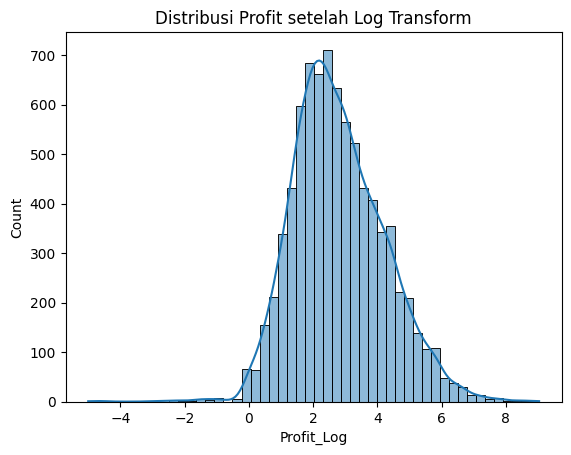

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transformasi log pada Profit (hindari log(0) dengan menambahkan 1)
df["Profit_Log"] = np.log1p(df["Profit"])
sns.histplot(df["Profit_Log"], bins=50, kde=True)
plt.title("Distribusi Profit setelah Log Transform")
plt.show()


**Visualisasi Distribusi Profit & Sales**

Melihat apakah ada outlier atau pola tertentu dalam distribusi profit dan sales.

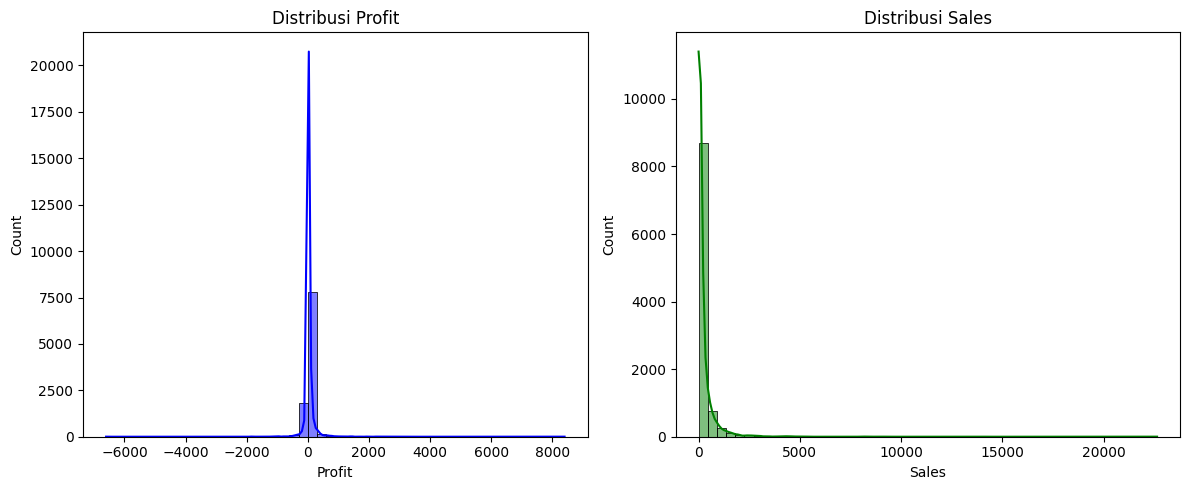

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram Profit
plt.subplot(1, 2, 1)
sns.histplot(df["Profit"], bins=50, kde=True, color="blue")
plt.title("Distribusi Profit")

# Histogram Sales
plt.subplot(1, 2, 2)
sns.histplot(df["Sales"], bins=50, kde=True, color="green")
plt.title("Distribusi Sales")

plt.tight_layout()
plt.show()


**Korelasi Antar Variabel Numerik**


1.   Mengetahui apakah Sales, Discount, atau Quantity memiliki hubungan yang kuat dengan Profit.

2.   Jika ada korelasi negatif antara Discount dan Profit, berarti diskon tinggi bisa menurunkan keuntungan.

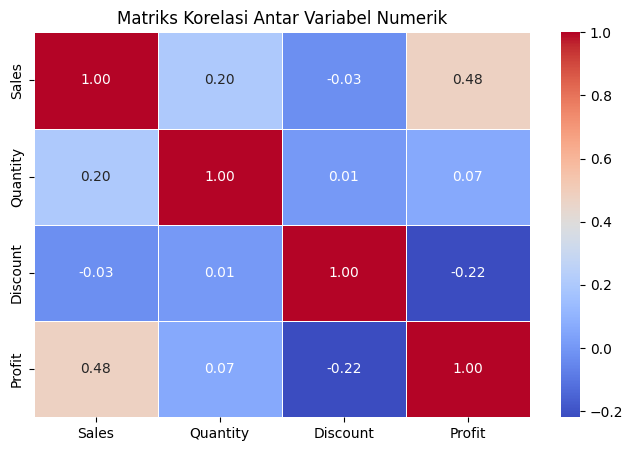

In [68]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = df[["Sales", "Quantity", "Discount", "Profit"]].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()


**Hubungan Discount vs Profit**

Mari kita lihat apakah diskon tinggi menyebabkan kerugian:



1.   Melihat apakah semakin besar diskon, semakin besar kemungkinan rugi.
2.   Jika titik-titiknya banyak di profit negatif saat diskon tinggi, berarti diskon harus dioptimalkan.



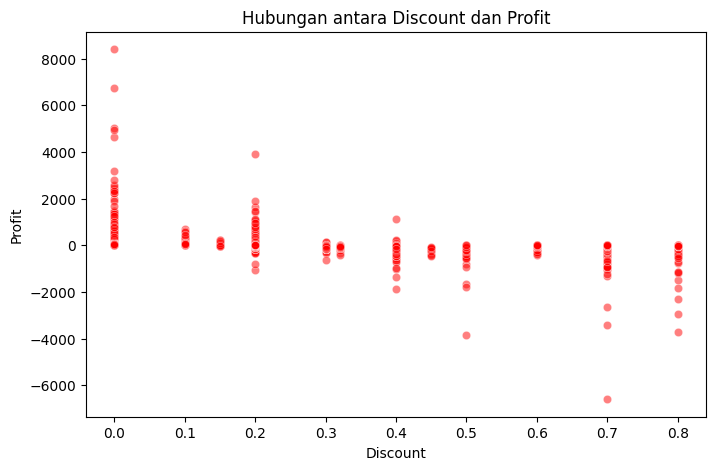

In [69]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5, color="red")
plt.title("Hubungan antara Discount dan Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


Sekarang kita akan melakukan segmentasi pelanggan menggunakan **K-Means Clustering**.

🔍 Kenapa Pakai K-Means?

📌 K-Means cocok digunakan karena:

1.   Mudah digunakan & cepat – Cocok untuk dataset besar.
2.   Membantu memahami pola pelanggan – Bisa mengelompokkan pelanggan berdasarkan pembelian mereka.
3. Dapat digunakan untuk strategi pemasaran – Misalnya, memberikan promo ke pelanggan tertentu.
4. Fokus pada pembagian data ke dalam kelompok tertentu berdasarkan kesamaan karakteristik, seperti Sales & Profit.








**Menentukan Jumlah Cluster (Elbow Method)**

Sebelum clustering, kita harus menentukan jumlah k yang optimal dengan **Elbow Method**:

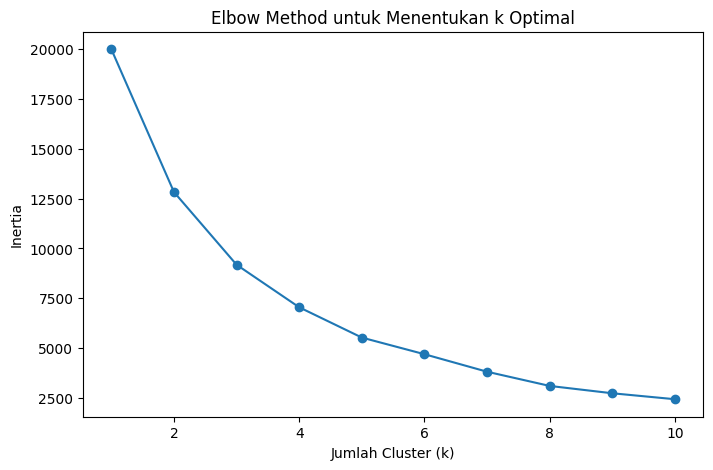

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih fitur untuk clustering (Sales dan Profit)
X = df[["Sales", "Profit"]].values

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mencari jumlah cluster optimal dengan Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.show()


In [71]:
from sklearn.metrics import silhouette_score

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score untuk k={k}: {score}")


Silhouette Score untuk k=2: 0.9584581383972166
Silhouette Score untuk k=3: 0.8426952357318208
Silhouette Score untuk k=4: 0.8618949940886338


kita pilih titik K yang paling optimal

🔥**Apakah k=2 yang Terbaik?**
Secara Silhouette Score, k=2 tampak optimal. Namun, kita harus mempertimbangkan:

**Kebutuhan Bisnis**
Jika hanya ada 2 segmen pelanggan, apakah cukup informatif?
Mungkin kita butuh lebih dari 2 kelompok untuk strategi penjualan yang lebih spesifik.


**Elbow Method & Interpretasi**
Sebelumnya, Elbow Method menunjukkan k=3 atau k=4 sebagai titik optimal.
Jika kita pakai k=4, Silhouette Score masih cukup tinggi (~0.86), dan ini memberikan segmentasi yang lebih detail.


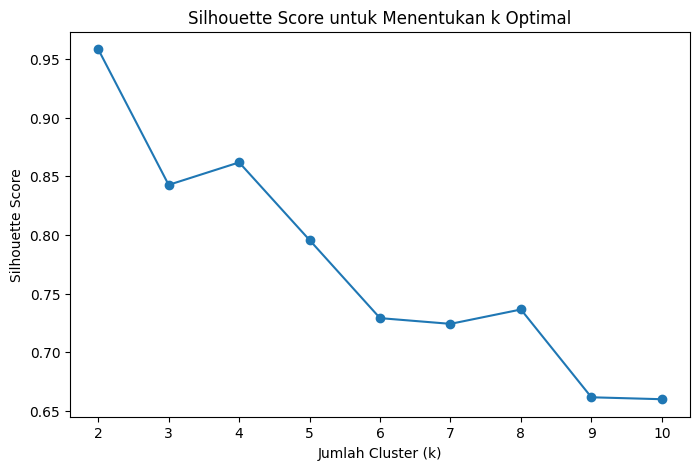

In [72]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Minimal k=2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Simpan nilai silhouette score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan k Optimal")
plt.show()


**Menerapkan K-Means Clustering**

Setelah menentukan k optimal, kita akan melakukan clustering:

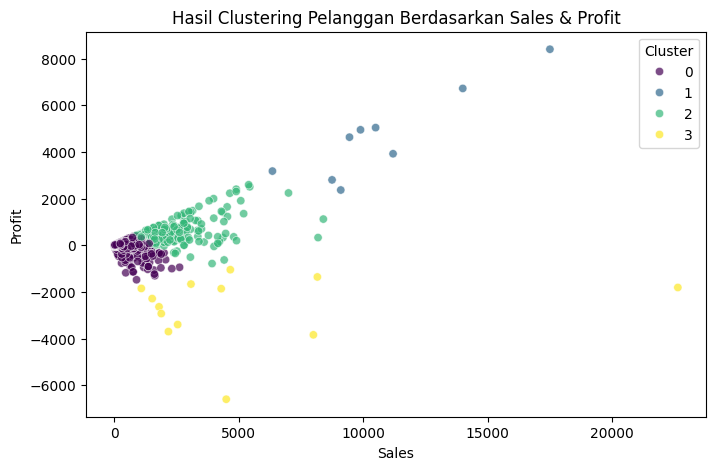

In [85]:
# Misalkan dari Elbow Method, kita memilih k=3
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sales"], y=df["Profit"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("Hasil Clustering Pelanggan Berdasarkan Sales & Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()


<ipython-input-89-ab570b8dda20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Profit", data=df, palette="viridis")


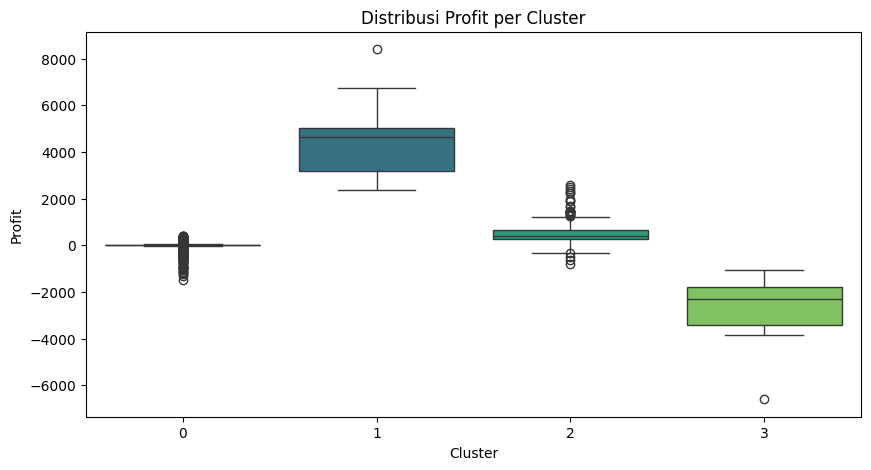

In [89]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cluster", y="Profit", data=df, palette="viridis")
plt.title("Distribusi Profit per Cluster")
plt.show()


<ipython-input-90-73ad20b3289e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Sales", data=df, palette="coolwarm")


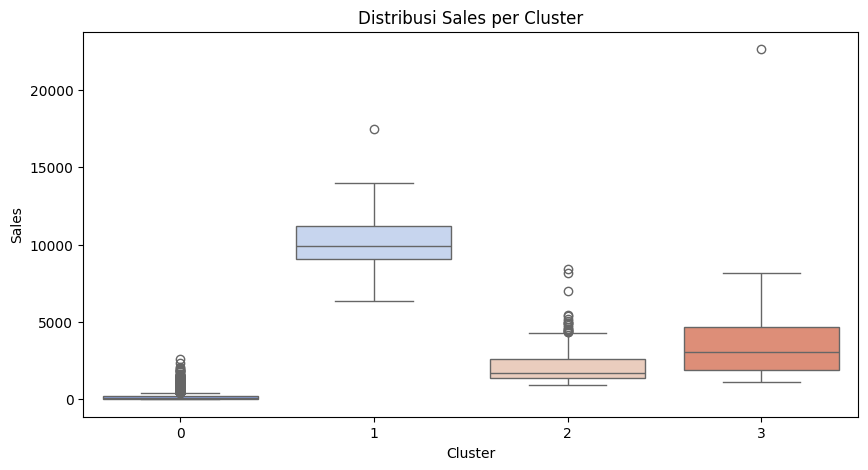

In [90]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cluster", y="Sales", data=df, palette="coolwarm")
plt.title("Distribusi Sales per Cluster")
plt.show()


berdasarkan visualisasi bloxplot tersebut kita bisa tau pengelompokan setiap clusternya

**Keterangan Pengelompokan Setiap Cluster**

Cluster 0 = Pelanggan dengan Sales rendah, Profit rendah (kemungkinan pembeli kecil atau diskon tinggi)

Cluster 1 = Pelanggan dengan Sales tinggi, Profit tinggi (kemungkinan pelanggan premium)

Cluster 2 = Pelanggan dengan Sales sedang, Profit stabil

Cluster 3 = Pelanggan dengan Profit negatif (kerugian besar, mungkin karena diskon besar)


In [87]:
df["Cluster"] = kmeans.labels_


In [88]:
cluster_summary = df.groupby("Cluster").agg({
    "Sales": "mean",
    "Profit": "mean",
    "Discount": "mean",
    "Quantity": "mean"
}).reset_index()

print(cluster_summary)


   Cluster         Sales       Profit  Discount  Quantity
0        0    154.130035    13.063647  0.158304  3.718702
1        1  10749.707556  4666.690833  0.022222  5.666667
2        2   2151.100089   511.805896  0.072977  5.923077
3        3   5105.749231 -2692.140069  0.600000  6.153846


Sebelum membangun model, kita harus memilih fitur yang relevan.

# **Feature Engineering**

In [74]:
# Menambahkan fitur baru
df["Profit_Margin"] = df["Profit"] / df["Sales"]  # Profit sebagai persentase dari sales
df["Discount_Impact"] = df["Discount"] * df["Sales"]  # Dampak diskon terhadap sales
df["Log_Sales"] = np.log1p(df["Sales"])  # Mengurangi efek outlier pada sales
df["Log_Profit"] = np.log1p(df["Profit"])  # Mengurangi efek outlier pada profit

# Winsorizing Profit untuk mengurangi efek outlier (5% batas bawah & atas)
from scipy.stats.mstats import winsorize
df["Profit_Winsorized"] = winsorize(df["Profit"], limits=[0.05, 0.05])

# Gunakan Profit_Winsorized sebagai target
target = "Profit_Winsorized"

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
# One-Hot Encoding untuk kolom kategori
df_encoded = pd.get_dummies(df, columns=["Category", "Segment", "Ship Mode"], drop_first=True)
print(df_encoded)

# Memilih fitur baru
#features = ["Sales", "Quantity", "Discount"] + list(df_encoded.columns[-6:])  # Tambahkan fitur kategori
#X = df_encoded[features]
#y = df_encoded["Profit"]

# Cek apakah X memiliki nilai 0 dan 1
#print(X.head())




      Row ID        Order ID  Order Date   Ship Date Customer ID  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
1          2  CA-2016-152156   11/8/2016  11/11/2016    CG-12520   
2          3  CA-2016-138688   6/12/2016   6/16/2016    DV-13045   
3          4  US-2015-108966  10/11/2015  10/18/2015    SO-20335   
4          5  US-2015-108966  10/11/2015  10/18/2015    SO-20335   
...      ...             ...         ...         ...         ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    TB-21400   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017    DB-13060   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017    DB-13060   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017    DB-13060   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    CC-12220   

         Customer Name        Country             City       State  \
0          Claire Gute  United States        Henderson    Kentucky   
1          Claire Gute  United States      

In [76]:
# Pilih fitur yang akan digunakan dalam model
features = ["Sales", "Quantity", "Discount", "Profit_Margin", "Discount_Impact", "Log_Sales"] + list(df_encoded.columns[-6:])
X = df_encoded[features]
y = df_encoded[target]


# **Model Building & Hyperparameter Tuning**

**Membagi Data Menjadi Training & Testing Set**

Melatih model pada 80% data dan menguji akurasi pada 20% sisanya.

In [77]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset
X_train.shape, X_test.shape


((7995, 12), (1999, 12))

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter untuk tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Hyperparameter Tuning dengan RandomizedSearchCV
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Gunakan parameter terbaik
best_rf = rf_search.best_estimator_
print("Best Params:", rf_search.best_params_)


Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


# **Model Evaluation & Interpretation**

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Inisialisasi model XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training model
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


XGBoost MAE: 0.7027854348513067
XGBoost MSE: 6.06711740546925
XGBoost R²: 0.9973766813049842


In [80]:
import joblib
joblib.dump(xgb_model, "xgboost_superstore_model.pkl")


['xgboost_superstore_model.pkl']

Pembuatan Model Prediksi Superstore telah selesai, kalian bisa mengaplikasikannya pada program kalian atau membuat dashboard di`streamlit`. Namun, untuk menghadapi berbagai macam kasus dan data yang berbeda, penting bagi kita untuk memahami algoritma model yang dipilih. Hal ini mencakup pemilihan fitur target, penambahan fitur baru jika diperlukan, serta penyeimbangan kelas guna meningkatkan akurasi dan menurunkan tingkat error. Dengan pendekatan yang tepat dan analisis yang mendalam, kita dapat membangun model yang lebih optimal dan andal.

**JUST DO IT AND NEVER GIVE UP 🚀🔥**